standard_scaling 


In [9]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler


In [3]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [7]:
# import the scaler
scalar=StandardScaler()
#fit the scaler of data 
scalardf=scalar.fit_transform(df)
scalardf=pd.DataFrame(scalardf,columns=df.columns)
scalardf.head()




,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [10]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [11]:
# MAXABSULTE_SCALAR
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [12]:
from sklearn.preprocessing import RobustScaler

# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


In [13]:
# more example of robustscalar 
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

# Sample data with outliers
data = {'A': [1, 2, 3, 4, 5, 6, 100],
        'B': [2, 3, 4, 5, 6, 7, 200],
        'C': [3, 4, 5, 6, 7, 8, 300]}
df = pd.DataFrame(data)

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the result back to a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)
  

           A          B          C
0  -1.000000  -1.000000  -1.000000
1  -0.666667  -0.666667  -0.666667
2  -0.333333  -0.333333  -0.333333
3   0.000000   0.000000   0.000000
4   0.333333   0.333333   0.333333
5   0.666667   0.666667   0.666667
6  32.000000  65.000000  98.000000


NORMALIZATION  OF NON NORMAL DATA 

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [20]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

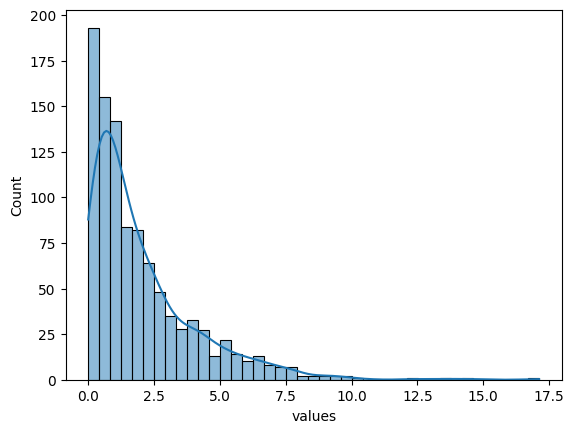

In [21]:
sns.histplot(df['values'],kde=True)


In [31]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox=PowerTransformer(method='box-cox',standardize=True ) 
pt_yeo_johnson =PowerTransformer(method='yeo-johnson',standardize=True)
ql_normal=QuantileTransformer(output_distribution='normal')
# boxcox must be positive .
df['box_cox']=pt_boxcox.fit_transform(df[['values']]+ 1)
df['yeo_johnson']=pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile']=ql_normal.fit_transform(df[['values']])

In [32]:
df.head()

,values,box_cox,yeo_johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


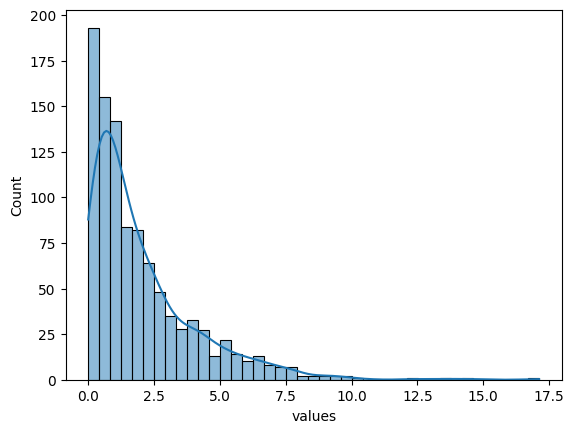

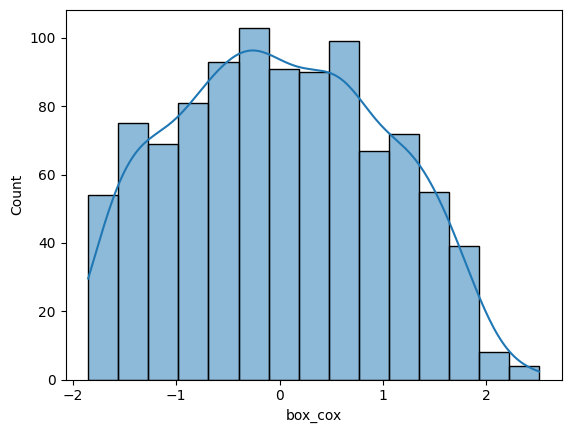

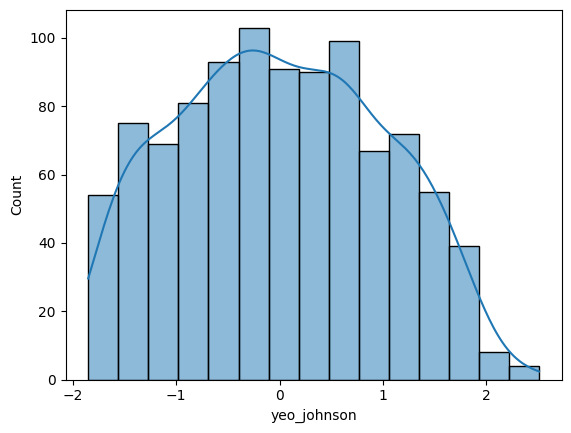

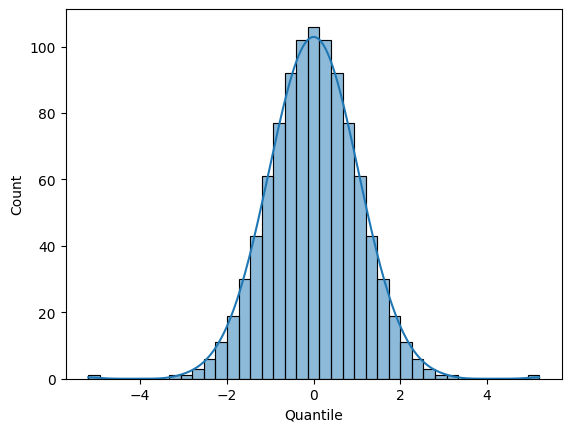

In [33]:
# create a hostagram using sns.hist and kde =true use a loop 
for  cl in df.columns:
 sns.histplot(df[cl],kde=True)
 plt.show()

normalization  l1 & l2 ...
normalization(l-2) works like a takes a square root of sum  of the square vector values .

In [2]:
# l-2 normalization 
from sklearn.preprocessing import Normalizer 
dataset1=[[1,1,1],[1,1,0],[1,1,0]]
normalize=Normalizer(norm='l2')
print(normalize.fit_transform(dataset1))


[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]]


In [3]:
# l-1 normalization 
from sklearn.preprocessing import Normalizer 
dataset2=[[1,1,1],[1,1,0],[1,1,0]]
normalize=Normalizer(norm='l1')
print(normalize.fit_transform(dataset2))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [0.5        0.5        0.        ]]


log transformation 

In [23]:
import pandas as pd 
import numpy as np 
#dataset of skewed values 
AM={"values": [10,20,30,50,100,200,400,500,1000,2000,3000]}
AM= pd.DataFrame(AM)
AM.head()



,values
0,10
1,20
2,30
3,50
4,100


<Axes: xlabel='values', ylabel='Count'>

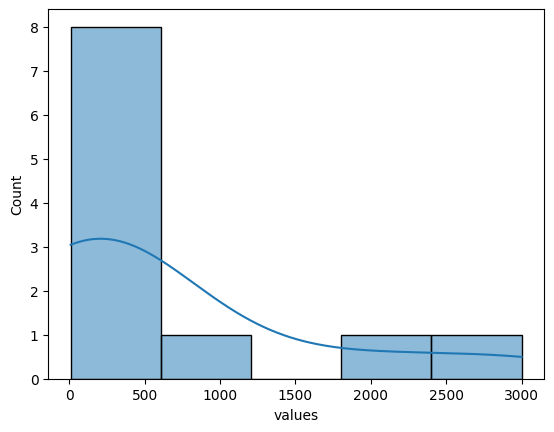

In [24]:
sns.histplot(AM['values'],kde=True)

In [25]:
AM['log2_values']=np.log(AM['values'])
AM.head()


,values,log2_values
0,10,2.302585
1,20,2.995732
2,30,3.401197
3,50,3.912023
4,100,4.605170


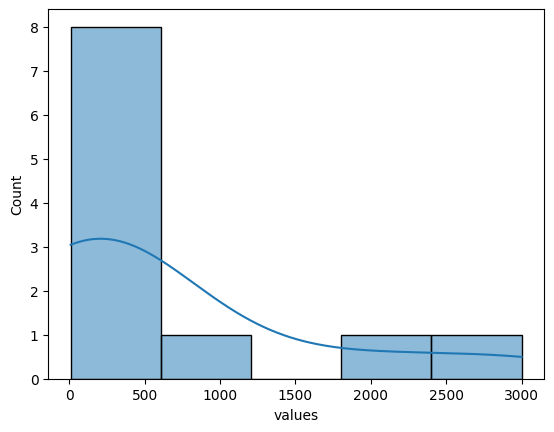

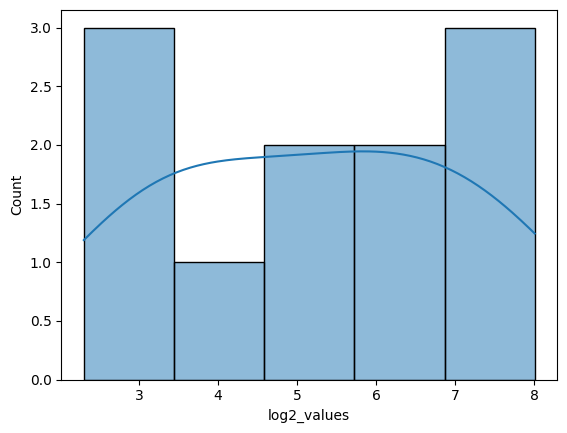

In [29]:
import matplotlib.pyplot as plt 
for col in AM.columns: 
    sns.histplot(AM[col],kde=True)
    plt.show()